<a href="https://colab.research.google.com/github/iampundir/Deep-Learning/blob/main/SP_Simple_MLP_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np


In [7]:
from sklearn.datasets import make_regression, make_circles, make_moons

In [8]:
data_moons, class_moons = make_moons(n_samples=10000, noise=0.05)

In [9]:
data_moons.shape

(10000, 2)

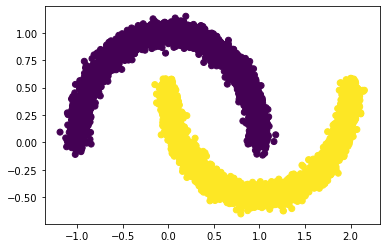

In [10]:
plt.scatter(data_moons[:,0],data_moons[:,1], c=class_moons)

In [11]:
data_regression, target_regression = make_regression(n_samples=10000, n_features=10, n_informative=8)

In [12]:
K.clear_session()
inp_reg = Input(shape=(10,),dtype=np.float32)
out_reg = Dense(units=1, activation='linear')(inp_reg)
reg_model = Model(inp_reg, out_reg)
reg_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [13]:
reg_model.compile(loss='mse', metrics=['mse'])
hist_reg = reg_model.fit(x=data_regression,y=target_regression, epochs=200, batch_size=32, validation_split=0.3)

Epoch 1/200
219/219 [==============================] - 1s 3ms/step - loss: 17552.4473 - mse: 17552.4473 - val_loss: 17504.6445 - val_mse: 17504.6445
Epoch 2/200
219/219 [==============================] - 1s 2ms/step - loss: 17426.2266 - mse: 17426.2266 - val_loss: 17379.4531 - val_mse: 17379.4531
Epoch 3/200
219/219 [==============================] - 1s 2ms/step - loss: 17302.6016 - mse: 17302.6016 - val_loss: 17255.1602 - val_mse: 17255.1602
Epoch 4/200
219/219 [==============================] - 1s 2ms/step - loss: 17176.4688 - mse: 17176.4688 - val_loss: 17130.3418 - val_mse: 17130.3418
Epoch 5/200
219/219 [==============================] - 0s 2ms/step - loss: 17052.8340 - mse: 17052.8340 - val_loss: 17006.9551 - val_mse: 17006.9551
Epoch 6/200
219/219 [==============================] - 1s 2ms/step - loss: 16930.3535 - mse: 16930.3535 - val_loss: 16883.1738 - val_mse: 16883.1738
Epoch 7/200
219/219 [==============================] - 0s 2ms/step - loss: 16806.4902 - mse: 16806.4902 - 

In [14]:
reg_model.get_weights()

[array([[17.827974  ],
        [41.856087  ],
        [40.961445  ],
        [39.115757  ],
        [37.724316  ],
        [21.508247  ],
        [31.603086  ],
        [ 0.44681638],
        [ 0.7067358 ],
        [ 1.1346073 ]], dtype=float32), array([0.31721562], dtype=float32)]

In [15]:
x = np.random.uniform(low=5, high=10, size=10000)
y = (1000000/(np.exp(5*(x)**0.5)+2**x+5))

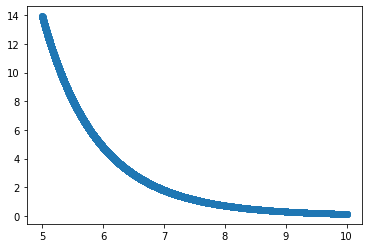

In [16]:
plt.scatter(x,y)

In [26]:
inp_nl_reg = Input(shape=(1,), dtype=np.float32)
h1_nl_reg = Dense(units=8, activation='relu')(inp_nl_reg)
out_nl_reg = Dense(units=1, activation='linear')(h1_nl_reg)
model_nl_reg = Model(inp_nl_reg, out_nl_reg)
model_nl_reg.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_nl_reg.compile(loss='mse', metrics=['mse'])
hist_nl_reg = model_nl_reg.fit(x=x.reshape(-1,1), y=y, batch_size=64, epochs=100, validation_split=0.3)

Epoch 1/100
110/110 [==============================] - 0s 3ms/step - loss: 31.4714 - mse: 31.4714 - val_loss: 19.3330 - val_mse: 19.3330
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 13.7847 - mse: 13.7847 - val_loss: 13.7814 - val_mse: 13.7814
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 12.3828 - mse: 12.3828 - val_loss: 13.4455 - val_mse: 13.4455
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 12.0140 - mse: 12.0140 - val_loss: 13.0208 - val_mse: 13.0208
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 11.6576 - mse: 11.6576 - val_loss: 12.6655 - val_mse: 12.6655
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 11.2739 - mse: 11.2739 - val_loss: 12.2345 - val_mse: 12.2345
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 10.8944 - mse: 10.8944 - val_loss: 11.8436 - val_mse: 11.8436
Epoch 8/100
110/110 [====================

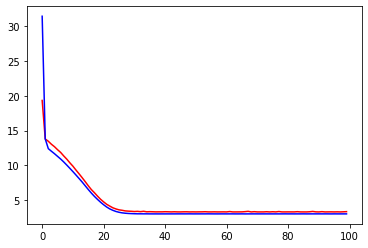

In [28]:
plt.plot(hist_nl_reg.epoch, hist_nl_reg.history['val_loss'], c='red')
plt.plot(hist_nl_reg.epoch, hist_nl_reg.history['loss'], c='blue')

In [29]:
class1_inp = Input(shape=(2,), dtype=np.float32)
h1_class1 = Dense(units=4, activation='relu')(class1_inp)
# h1_class1 = Dense(units=8, activation='relu')(h1_class1)
out_class1 = Dense(units=1, activation='sigmoid')(h1_class1)
model_class1 = Model(class1_inp, out_class1)
model_class1.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_class1.compile(loss='binary_crossentropy', metrics=['acc'])
hist_model_class1 = model_class1.fit(x=data_moons, y=class_moons, batch_size=64, epochs=100, validation_split=0.3)

Epoch 1/100
110/110 [==============================] - 0s 4ms/step - loss: 0.2035 - acc: 0.8950 - val_loss: 0.1992 - val_acc: 0.8947
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2035 - acc: 0.8941 - val_loss: 0.1988 - val_acc: 0.8957
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2033 - acc: 0.8943 - val_loss: 0.1987 - val_acc: 0.8993
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2033 - acc: 0.8950 - val_loss: 0.1987 - val_acc: 0.8990
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2035 - acc: 0.8950 - val_loss: 0.1987 - val_acc: 0.8963
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2033 - acc: 0.8950 - val_loss: 0.1991 - val_acc: 0.8947
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2032 - acc: 0.8937 - val_loss: 0.1986 - val_acc: 0.8990
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - 

In [31]:
xx, yy = np.meshgrid(np.linspace(-2,2,num=200),np.linspace(-2,2,num=200))

In [32]:
zz = model_class1.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

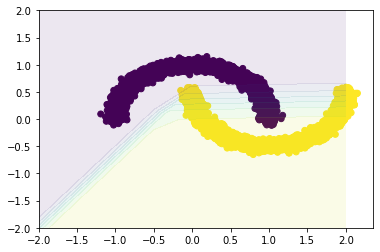

In [33]:
plt.scatter(data_moons[:,0],data_moons[:,1], c=class_moons)
plt.contourf(xx,yy,zz, alpha=0.1)